In [12]:
# Import modules
import math # for floor()
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as sp
import matplotlib.pyplot as plt

In [13]:
# Get the data into a Pandas dataframe

csv_file = "WSF19.csv"
wsf19_df = pd.read_csv( csv_file, comment='#' )
wsf19_df

,subj.num,secs.since.peak,avg.signal,sd.signal,mean,sd,z
0,19,0.0,1.835257,0.147661,0.163326,1.182554,1.413831
1,19,0.1,1.136229,0.280482,0.163326,1.182554,0.822713
2,19,0.2,0.278105,0.137785,0.163326,1.182554,0.097060
3,19,0.3,-0.246936,0.125130,0.163326,1.182554,-0.346929
4,19,0.4,-0.295717,0.133986,0.163326,1.182554,-0.388179
5,19,0.5,-0.805942,0.100340,0.163326,1.182554,-0.819639
6,19,0.6,-1.363735,0.241738,0.163326,1.182554,-1.291325
7,19,0.7,-1.063412,0.421378,0.163326,1.182554,-1.037363
8,19,0.8,-0.341220,0.293795,0.163326,1.182554,-0.426658
9,19,0.9,0.265930,0.295992,0.163326,1.182554,0.086764


In [14]:
# Get data for subject 19
boolIdx = np.all([(wsf19_df['subj.num'] >= 19), (wsf19_df['subj.num'] <= 19), ((wsf19_df['subj.num']%1) == 0)], axis=0)
subset_df = wsf19_df.loc[boolIdx,:].copy()
subset_df

,subj.num,secs.since.peak,avg.signal,sd.signal,mean,sd,z
0,19,0.0,1.835257,0.147661,0.163326,1.182554,1.413831
1,19,0.1,1.136229,0.280482,0.163326,1.182554,0.822713
2,19,0.2,0.278105,0.137785,0.163326,1.182554,0.097060
3,19,0.3,-0.246936,0.125130,0.163326,1.182554,-0.346929
4,19,0.4,-0.295717,0.133986,0.163326,1.182554,-0.388179
5,19,0.5,-0.805942,0.100340,0.163326,1.182554,-0.819639
6,19,0.6,-1.363735,0.241738,0.163326,1.182554,-1.291325
7,19,0.7,-1.063412,0.421378,0.163326,1.182554,-1.037363
8,19,0.8,-0.341220,0.293795,0.163326,1.182554,-0.426658
9,19,0.9,0.265930,0.295992,0.163326,1.182554,0.086764


In [15]:
# Import the things we'll need
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [16]:
x = subset_df["secs.since.peak"]
y = 1000* subset_df["z"]
y_var = y

In [17]:
# Construct a kernel, setting an intial length and amplitude
# Ideally these should be (perhaps crudely) estimated from data
initial_ell = (np.amax(x) - np.amin(x)) / 10
initial_scale = np.var( y ) 
rbf_kernel = initial_scale * RBF(length_scale=initial_ell, 
    length_scale_bounds=(initial_ell/20, 5 * initial_ell))

# Consrtuct the GP object: note the way the uncertainty in y_train enters
gp = GaussianProcessRegressor( kernel=rbf_kernel, alpha=y_var )

In [18]:
# Fit things
x_vec = x[:, np.newaxis] # makes x into a column vector
gp.fit( x_vec, y )

# Get the fitted A and ell from the posterior
fitted_kernel = gp.kernel_
fitted_params = fitted_kernel.get_params()
A = math.sqrt( fitted_params["k1__constant_value"] )
ell = fitted_params["k2__length_scale"]

In [19]:
xVals = np.linspace( 0, 1.0)

C:\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
C:\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:380: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


Text(0.5, 0, 'Seconds since peak')

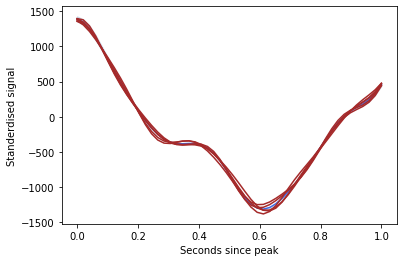

In [20]:
# Make predictions at positions listed in a vector xVals
xVal_vec = xVals[:, np.newaxis] # Build the N-by-1 array
y_mean, y_std = gp.predict(xVal_vec, return_std=True)

# Plot the mean with a +/- one std_dev shaded band
plt.plot( xVals, y_mean, color="royalblue" )
plt.fill_between(xVals, y_mean - y_std, y_mean + y_std, alpha=0.5, color="lightsteelblue" )

# Construct and plot random functions drawn from the posterior
nSamples = 5
y_samples = gp.sample_y( xVal_vec, nSamples )
plt.plot( xVals, y_samples, color="brown" )
plt.ylabel ('Standerdised signal')
plt.xlabel ('Seconds since peak')

In [21]:
# Construct some random functions sampled from the posterior
nSamples = 7
y_samples = gp.sample_y( xVal_vec, nSamples )

# Print the values of the first sample
print( y_samples[:,1])
print( y_samples[:,2])
print( y_samples[:,3])
print( y_samples[:,4])
print( y_samples[:,5])
print( y_samples[:,6])

[ 1390.33813823  1346.1468837   1256.3434621   1128.5062655
   974.01183108   806.23241334   638.22763256   480.15249637
   337.21231348   209.24278784    92.43635023   -17.40716277
  -121.68164492  -217.46818965  -298.46185877  -357.8180728
  -391.57144215  -401.23590014  -394.72651071  -385.38187084
  -389.31405749  -421.60968266  -492.20465606  -602.55262908
  -744.26959835  -900.52575597 -1050.06922792 -1172.72774048
 -1254.53655233 -1290.67690126 -1285.24636162 -1248.17626795
 -1190.7431905  -1121.53450079 -1044.27211918  -957.92819027
  -858.67012282  -742.73091663  -609.27522631  -462.43379648
  -311.75522054  -170.52751077   -52.00790384    35.45086511
    92.53396495   130.37659845   168.1540158    227.32753835
   324.52120195   465.65873773]
[ 1363.60707933  1306.72714914  1213.44771584  1097.4644644
   970.00944759   836.96336388   698.36276297   550.66617817
   390.87588524   220.67944418    48.64391973  -110.76045305
  -241.20808588  -330.17280799  -373.89138589  -379.4501

C:\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:380: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


In [22]:
print(gp.predict)

<bound method GaussianProcessRegressor.predict of GaussianProcessRegressor(alpha=0     1413.830649
1      822.713077
2       97.060292
3     -346.928534
4     -388.178962
5     -819.639440
6    -1291.324681
7    -1037.362985
8     -426.657847
9       86.764493
10     450.983964
11    1300.628470
Name: z, dtype: float64,
                         copy_X_train=True,
                         kernel=839**2 * RBF(length_scale=0.11),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)>


Text(0.5, 0, 'Z scores for seconds since peak')

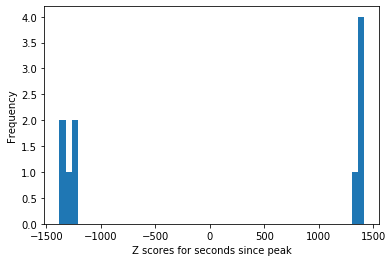

In [23]:
x = [1390.33813823, -1290.67690126, 1363.60707933, -1379.85279797, 1355.81646227,  -1247.82474599, 1360.15098499,  -1330.05172646, 1415.07296449, -1252.90056111]
plt.hist (x, bins = 50)
plt.ylabel ('Frequency')
plt.xlabel ('Z scores for seconds since peak')
